<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

rainfall-monthly-highest-daily-total.csv

rainfall-monthly-number-of-rain-days.csv

rainfall-monthly-total.csv

relative-humidity-monthly-mean.csv

Average Daily Ridership.csv (https://www.sbstransit.com.sg/ridership)

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

The trains in Singapore are often utilise by the general public. Does the riderships on trains increase when it rains? Should the frequency of trains increase on rainy months?

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [415]:
# Code:
def calculate_mean(values):
    if len(values) == 0:
        return 0  # Returning 0 if the list is empty

    total = 0
    for num in values:
        total += num

    mean = total / len(values)
    return mean

In [416]:
numbers = [2, 4, 6, 8, 10]
result = calculate_mean(numbers)
print("Mean:", result)

Mean: 6.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [497]:
# Code:

def calculate_standard_deviation(values):
    mean = calculate_mean(values)

    squared_diff_sum = 0
    for num in values:
        squared_diff_sum += (num - mean) ** 2

    variance = squared_diff_sum / len(values)
    standard_deviation = variance**(1/2)
    return standard_deviation

In [498]:
numbers = [2, 4, 6, 8, 10]
result = calculate_standard_deviation(numbers)
print("Standard Deviation:", result)

Standard Deviation: 2.8284271247461903


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [698]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [699]:
#Convert and assign to dataframe
#Code:
highest_daily = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
rainfall_monthly = pd.read_csv('../data/rainfall-monthly-total.csv')
monthly_mean = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
ridership = pd.read_csv('../data/Average Daily Ridership.csv')
df_list=[highest_daily,rain_days, rainfall_monthly, monthly_mean,ridership]


In [700]:
# Code
#1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
for df in df_list:
    print(df.head())
    

     month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2
      Month     2014     2015     2016     2017       2018       2019  \
0   January  649,460  686,426  875,831  934,363  1,142,026  1,250,833   
1  February  627,959  691,918  859,465  948,224  1,141,750  1,186,795   
2     March  637,010  688,147  880,966  955,433  1,144,294  1,217,877   
3     April  637,727  68

In [701]:
#2. Check for missing values.
for df in df_list:
    print("\n",df.isnull().sum())


 month                        0
maximum_rainfall_in_a_day    0
dtype: int64

 month               0
no_of_rainy_days    0
dtype: int64

 month             0
total_rainfall    0
dtype: int64

 month      0
mean_rh    0
dtype: int64

 Month    0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     8
dtype: int64


In [702]:
#2. Check for datatype.
for df in df_list:
    print("\n",df.dtypes)


 month                         object
maximum_rainfall_in_a_day    float64
dtype: object

 month               object
no_of_rainy_days     int64
dtype: object

 month              object
total_rainfall    float64
dtype: object

 month       object
mean_rh    float64
dtype: object

 Month    object
2014     object
2015     object
2016     object
2017     object
2018     object
2019     object
2020     object
2021     object
2022     object
2023     object
dtype: object


In [703]:
#3. Check for any obvious issues with the observations.

# Make all the column names lower case and make the change permanent 
# by re-assigning it back to the columns attribute
ridership.columns = ridership.columns.str.lower()


#4. Fix any errors you identified in steps 2-3.
#Renaming the months into numerical for merging later
ridership['month']=['-01','-02','-03','-04','-05','-06','-07','-08','-09','-10','-11','-12']

ridership



,month,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,-01,"649,460","686,426","875,831","934,363","1,142,026","1,250,833","1,195,131","844,322","848,905","1,088,294"
1,-02,"627,959","691,918","859,465","948,224","1,141,750","1,186,795","1,016,292","853,580","781,820","1,177,836"
2,-03,"637,010","688,147","880,966","955,433","1,144,294","1,217,877","923,319","882,892","853,049","1,163,149"
3,-04,"637,727","689,305","879,413","937,046","1,149,121","1,213,490","288,664","897,317","930,979","1,137,194"
4,-05,"641,864","696,010","886,145","925,537","1,146,071","1,201,397","195,515","621,167","974,217",NaN
5,-06,"654,114","695,964","882,270","919,224","1,140,105","1,167,470","421,444","569,958","1,006,992",NaN
6,-07,"678,218","738,130","924,305","970,856","1,222,488","1,273,328","628,983","675,404","1,016,961",NaN
7,-08,"687,131","736,760","931,257","974,022","1,212,155","1,238,783","685,186","685,256","1,067,320",NaN
8,-09,"684,510","713,374","931,944","949,122","1,210,267","1,236,770","735,858","729,145","1,094,397",NaN
9,-10,"676,531","724,470","924,299","1,010,020","1,221,798","1,241,812","776,078","640,011","1,084,738",NaN


In [704]:
#renaming to shorten name: maximum_rainfall_in_a_day column to max_rain_day

highest_daily = highest_daily.rename (columns={'maximum_rainfall_in_a_day': 'max_rain_day'})

In [705]:
highest_daily

,month,max_rain_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0
...,...,...
486,2022-07,27.8
487,2022-08,32.4
488,2022-09,38.2
489,2022-10,38.8


In [706]:

#5b. If the month column data is better analyzed as month and year, create new columns for the same
ridership = pd.melt(ridership, id_vars='month',value_name='riders',var_name='year', value_vars=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])


In [707]:
ridership

,month,year,riders
0,-01,2014,"649,460"
1,-02,2014,"627,959"
2,-03,2014,"637,010"
3,-04,2014,"637,727"
4,-05,2014,"641,864"
...,...,...,...
115,-08,2023,NaN
116,-09,2023,NaN
117,-10,2023,NaN
118,-11,2023,NaN


In [708]:
#5a. Fix any individual values preventing other columns from being the appropriate type.
ridership.loc[:,'riders']=ridership['riders'].str.replace(',','')


In [709]:
#Drop NaN
ridership=ridership.dropna()
ridership

,month,year,riders
0,-01,2014,649460
1,-02,2014,627959
2,-03,2014,637010
3,-04,2014,637727
4,-05,2014,641864
...,...,...,...
107,-12,2022,1081885
108,-01,2023,1088294
109,-02,2023,1177836
110,-03,2023,1163149


In [710]:


#5. Fix any incorrect data types found in step 5.
ridership.loc[:,'riders']=ridership['riders'].astype(int)



/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/2695008481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridership.loc[:,'riders']=ridership['riders'].astype(int)
/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/2695008481.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ridership.loc[:,'riders']=ridership['riders'].astype(int)


In [711]:
#check datatype
ridership.dtypes

month     object
year      object
riders     int64
dtype: object

In [712]:
#concate year column and month column
ridership.loc[:,'month']= ridership['year']+ridership['month']
#main.loc[:,'riders']=main['riders'].astype(int)



/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/1756202602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridership.loc[:,'month']= ridership['year']+ridership['month']


In [713]:
ridership

,month,year,riders
0,2014-01,2014,649460
1,2014-02,2014,627959
2,2014-03,2014,637010
3,2014-04,2014,637727
4,2014-05,2014,641864
...,...,...,...
107,2022-12,2022,1081885
108,2023-01,2023,1088294
109,2023-02,2023,1177836
110,2023-03,2023,1163149


In [714]:
#6c. Drop unnecessary rows (if needed).
#dropping year column
ridership.drop(columns=['year'],axis=1,inplace=True)


/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/3689917057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridership.drop(columns=['year'],axis=1,inplace=True)


In [715]:
ridership.head()

,month,riders
0,2014-01,649460
1,2014-02,627959
2,2014-03,637010
3,2014-04,637727
4,2014-05,641864


In [716]:
df_list=[highest_daily,rain_days, rainfall_monthly, monthly_mean,ridership]

In [717]:
#6b. Column names should not contain spaces (underscores will suffice--this allows for using the df.column_name method to access columns in addition to df['column_name']).
#Column names should be unique and informative.
df_list


[       month  max_rain_day
 0    1982-01          36.5
 1    1982-02           9.4
 2    1982-03          61.7
 3    1982-04          45.1
 4    1982-05          33.0
 ..       ...           ...
 486  2022-07          27.8
 487  2022-08          32.4
 488  2022-09          38.2
 489  2022-10          38.8
 490  2022-11          53.0
 
 [491 rows x 2 columns],
        month  no_of_rainy_days
 0    1982-01                10
 1    1982-02                 5
 2    1982-03                11
 3    1982-04                14
 4    1982-05                10
 ..       ...               ...
 483  2022-04                18
 484  2022-05                12
 485  2022-06                17
 486  2022-07                16
 487  2022-08                15
 
 [488 rows x 2 columns],
        month  total_rainfall
 0    1982-01           107.1
 1    1982-02            27.8
 2    1982-03           160.8
 3    1982-04           157.0
 4    1982-05           102.2
 ..       ...             ...
 483  2022-04   

In [718]:
#Checkpoint
#8. Merge dataframes that can be merged.
#Since different climate metrics are in month format, 
#I can merge them into one single dataframe for easier analysis
#merge on month
main = pd.merge(highest_daily, rain_days, on='month', how='outer')
main = pd.merge(main,rainfall_monthly, on='month', how='outer' )
main = pd.merge(main,monthly_mean, on='month', how='outer' )
main = pd.merge(main,ridership, on='month', how='outer' )


In [719]:
main

,month,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,1982-01,36.5,10.0,107.1,81.2,NaN
1,1982-02,9.4,5.0,27.8,79.5,NaN
2,1982-03,61.7,11.0,160.8,82.3,NaN
3,1982-04,45.1,14.0,157.0,85.9,NaN
4,1982-05,33.0,10.0,102.2,83.2,NaN
...,...,...,...,...,...,...
491,2022-12,NaN,NaN,NaN,NaN,1081885.0
492,2023-01,NaN,NaN,NaN,NaN,1088294.0
493,2023-02,NaN,NaN,NaN,NaN,1177836.0
494,2023-03,NaN,NaN,NaN,NaN,1163149.0


In [720]:
#Check Nulls
main.isnull().sum()

month                 0
max_rain_day          5
no_of_rainy_days      8
total_rainfall        8
mean_rh               5
riders              384
dtype: int64

In [722]:
#7. Drop unnecessary rows (if needed).
#drop na rows
main=main.dropna()

#6b. Column names should not contain spaces (underscores will suffice--this allows for using the df.column_name method to access columns in addition to df['column_name']).
#Column names should be unique and informative.


In [723]:
#9.Perform any additional cleaning that you feel is necessary.
#Re-Check for Nulls
main.isnull().sum()

month               0
max_rain_day        0
no_of_rainy_days    0
total_rainfall      0
mean_rh             0
riders              0
dtype: int64

In [724]:
main.loc[:,'riders']=main['riders'].astype(int)
main['no_of_rainy_days']=main['no_of_rainy_days'].astype(int)


 
 

/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/1725231032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main.loc[:,'riders']=main['riders'].astype(int)
/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/1725231032.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  main.loc[:,'riders']=main['riders'].astype(int)
/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/1725231032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [730]:
main.dtypes


month                object
max_rain_day        float64
no_of_rainy_days      int64
total_rainfall      float64
mean_rh             float64
riders                int64
dtype: object

In [733]:
main.head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,2014-01,31.2,5,75.4,78.5,649460
1,2014-02,0.2,1,0.2,74.5,627959
2,2014-03,52.6,6,66.0,76.0,637010
3,2014-04,28.8,17,110.0,80.0,637727
4,2014-05,22.2,18,125.8,80.2,641864


In [727]:
main.reset_index(inplace=True)


In [728]:
main.drop(columns=['index'],axis=1,inplace=True)
main

/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/4291859722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main.drop(columns=['index'],axis=1,inplace=True)


,month,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,2014-01,31.2,5,75.4,78.5,649460
1,2014-02,0.2,1,0.2,74.5,627959
2,2014-03,52.6,6,66.0,76.0,637010
3,2014-04,28.8,17,110.0,80.0,637727
4,2014-05,22.2,18,125.8,80.2,641864
...,...,...,...,...,...,...
99,2022-04,58.8,18,239.6,80.0,930979
100,2022-05,44.6,12,102.0,76.5,974217
101,2022-06,59.4,17,211.8,79.1,1006992
102,2022-07,27.8,16,145.2,76.8,1016961


In [732]:
main.rename(columns={
    'month': 'date'
}, inplace=True)



/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/3056113657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main.rename(columns={


In [734]:
main['date'] = main['date'].astype('datetime64[ns]')

/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/2504830780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main['date'] = main['date'].astype('datetime64[ns]')


In [735]:
main.dtypes

date                datetime64[ns]
max_rain_day               float64
no_of_rainy_days             int64
total_rainfall             float64
mean_rh                    float64
riders                       int64
dtype: object

In [736]:
main

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,2014-01-01,31.2,5,75.4,78.5,649460
1,2014-02-01,0.2,1,0.2,74.5,627959
2,2014-03-01,52.6,6,66.0,76.0,637010
3,2014-04-01,28.8,17,110.0,80.0,637727
4,2014-05-01,22.2,18,125.8,80.2,641864
...,...,...,...,...,...,...
99,2022-04-01,58.8,18,239.6,80.0,930979
100,2022-05-01,44.6,12,102.0,76.5,974217
101,2022-06-01,59.4,17,211.8,79.1,1006992
102,2022-07-01,27.8,16,145.2,76.8,1016961


In [737]:
#10.  Save your cleaned and merged dataframes as csv files.
main.to_csv("../data/combined_datasets.csv")

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

# **To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

| Feature          | Type    | Dataset                              | Description               |   |
|------------------|---------|--------------------------------------|---------------------------|---|
| total_rainfall   | float   | rainfall-monthly-total               | Monthly Total Rainfall by month from 2014 to 2022  |   |
| highest_daily    | float   | rainfall-monthly-highest-daily-total | Monthly Highest Rainfall by month from 2014 to 2022  |   |
| relative_humidity| float   | relative-humidity-monthly-mean       | Monthly Relative Humidity by month from 2014 to 2022 |   |
| ridership        | int | Average Daily Ridership              | Average Daily Ridership by month from 2014 to 2022  |   |
| rain_days        | int | rainfall-monthly-number-of-rain-days | Monthly Relative Humidity by month from 2014 to 2022 |   |


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [817]:
#1. Summary Statistics.
main.describe()



,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
count,104.000000,104.000000,104.000000,104.000000,1.040000e+02
mean,41.582692,13.961538,152.468269,78.347115,8.900800e+05
std,25.768696,5.570245,99.467086,3.059918,2.254087e+05
min,0.200000,1.000000,0.200000,72.000000,1.955150e+05
25%,28.550000,10.000000,84.350000,76.475000,6.950235e+05
50%,38.000000,14.000000,140.000000,78.150000,8.845185e+05
75%,52.900000,18.000000,194.300000,80.000000,1.085532e+06
max,210.600000,27.000000,692.800000,86.600000,1.273328e+06


In [746]:
#Assign the output to variable sd as a dictionary where:
#Each column name is now a key
#Use a dictionary comprehension to apply the standard deviation function you create in part 1
#to each numeric column in the dataframe. No loops.
#That standard deviation of the column is the value
#Example Output : {'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}



sd = {col: calculate_standard_deviation(main[col]) for col in main.select_dtypes(include=np.number)}

sd

{'max_rain_day': 25.64450924252482,
 'no_of_rainy_days': 5.543400575533796,
 'total_rainfall': 98.98772385466553,
 'mean_rh': 3.0451713584084237,
 'riders': 224322.33840387012}

In [748]:
#Investigate trends in the data.
#Using sorting and/or masking (along with the .head() method to avoid printing our entire dataframe),
#consider questions relevant to your problem statement.
#Some examples are provided below (but feel free to change these questions for your specific problem):

#main.loc[main.year.isin(['2015,']), :]

In [957]:
#Which month have the HIGHEST total rainfall in 2015, 2017, 2019 and 2021?

highest_2015 = main[main['date'].dt.strftime('%Y') == '2015'].sort_values('total_rainfall', ascending=False).head()
highest_2015

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
23,2015-12-01,40.4,19,302.3,81.1,771239
19,2015-08-01,63.2,11,185.8,76.7,736760
18,2015-07-01,45.8,13,116.8,74.9,738130
17,2015-06-01,28.4,10,95.8,75.8,695964
16,2015-05-01,22.2,12,89.0,78.9,696010


In [956]:
highest_2017 = main[main['date'].dt.strftime('%Y') == '2017'].sort_values('total_rainfall', ascending=False).head()
highest_2017


,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
47,2017-12-01,69.8,23,371.2,85.2,1079944
46,2017-11-01,45.2,24,268.6,86.3,1102296
39,2017-04-01,42.8,21,208.6,83.5,937046
36,2017-01-01,60.6,21,197.6,84.8,934363
40,2017-05-01,44.8,15,190.0,82.8,925537


In [954]:
highest_2019 = main[main['date'].dt.strftime('%Y') == '2019'].sort_values('total_rainfall', ascending=False).head()
highest_2019

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
71,2019-12-01,74.2,14,421.5,83.9,1170724
69,2019-10-01,92.2,15,176.8,78.1,1241812
63,2019-04-01,52.4,9,174.8,77.6,1213490
65,2019-06-01,37.6,16,173.8,79.5,1167470
70,2019-11-01,73.4,15,137.4,79.2,1213402


In [955]:
highest_2021 = main[main['date'].dt.strftime('%Y') == '2021'].sort_values('total_rainfall', ascending=False).head()
highest_2021

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
84,2021-01-01,210.6,17,692.8,82.6,844322
94,2021-11-01,47.8,23,312.4,81.7,709651
91,2021-08-01,71.4,24,293.6,80.4,685256
87,2021-04-01,83.8,14,290.4,77.4,897317
88,2021-05-01,49.8,13,245.8,79.3,621167


In [959]:
#Which month have the LOWEST total rainfall in 2015, 2017, 2019 and 2021?
lowest_2015 = main[main['date'].dt.strftime('%Y') == '2015'].sort_values('total_rainfall', ascending=True).head()
lowest_2015

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
13,2015-02-01,10.8,6,18.8,75.4,691918
20,2015-09-01,18.4,8,61.6,75.0,713374
22,2015-11-01,25.8,13,72.6,79.1,708426
15,2015-04-01,18.8,13,73.2,77.1,689305
12,2015-01-01,33.6,6,79.6,77.6,686426


In [961]:
lowest_2017 = main[main['date'].dt.strftime('%Y') == '2017'].sort_values('total_rainfall', ascending=True).head()
lowest_2017

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
42,2017-07-01,30.2,9,79.6,79.6,970856
43,2017-08-01,29.4,18,84.2,79.9,974022
41,2017-06-01,29.6,10,106.0,80.2,919224
45,2017-10-01,31.2,18,120.8,82.5,1010020
44,2017-09-01,20.2,19,124.4,81.0,949122


In [962]:
lowest_2019 = main[main['date'].dt.strftime('%Y') == '2019'].sort_values('total_rainfall', ascending=True).head()
lowest_2019

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
67,2019-08-01,3.8,6,11.8,72.1,1238783
66,2019-07-01,6.6,8,12.2,75.2,1273328
68,2019-09-01,16.4,4,22.8,73.0,1236770
61,2019-02-01,13.4,5,31.6,74.1,1186795
60,2019-01-01,38.2,9,63.6,75.6,1250833


In [963]:
lowest_2021 = main[main['date'].dt.strftime('%Y') == '2021'].sort_values('total_rainfall', ascending=True).head()
lowest_2021

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
85,2021-02-01,0.6,2,1.0,73.8,853580
89,2021-06-01,23.8,20,93.4,77.8,569958
95,2021-12-01,46.8,15,119.6,79.7,819753
93,2021-10-01,59.6,14,177.0,78.3,640011
86,2021-03-01,38.0,14,182.4,76.6,882892


In [986]:
#Which year have the HIGHEST total rainfall in the date range of analysis?
#Code:


highest_total_y15=main[main['date'].dt.strftime('%Y') == '2015'].sort_values('total_rainfall', ascending=False).sum()
highest_total_y15
highest_total_y17=main[main['date'].dt.strftime('%Y') == '2017'].sort_values('total_rainfall', ascending=False).sum()
highest_total_y17
highest_total_y19=main[main['date'].dt.strftime('%Y') == '2019'].sort_values('total_rainfall', ascending=False).sum()
highest_total_y19
highest_total_y21=main[main['date'].dt.strftime('%Y') == '2021'].sort_values('total_rainfall', ascending=False).sum()




/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/863048027.py:5: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  highest_total_y15=main[main['date'].dt.strftime('%Y') == '2015'].sort_values('total_rainfall', ascending=False).sum()
/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/863048027.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  highest_total_y17=main[main['date'].dt.strftime('%Y') == '2017'].sort_values('total_rainfall', ascending=False).sum()
/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T

In [1015]:

highest_total_y =pd.concat([highest_total_y15, highest_total_y17,highest_total_y19,highest_total_y21], axis=1)
highest_total_y.rename(columns={0: '2015',1:'2017',2:'2019',3:'2021'}, inplace=True)





In [1022]:
highest_total_y=highest_total_y.transpose()


,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
2015,382.0,125.0,1267.1,922.8,8540169.0
2017,465.0,204.0,2045.6,991.5,11706087.0
2019,454.4,120.0,1367.5,919.8,14612681.0
2021,770.6,182.0,2809.6,941.4,8928456.0


In [1034]:
highest_total_y.sort_values(['total_rainfall'],ascending=False)

,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
2021,770.6,182.0,2809.6,941.4,8928456.0
2017,465.0,204.0,2045.6,991.5,11706087.0
2019,454.4,120.0,1367.5,919.8,14612681.0
2015,382.0,125.0,1267.1,922.8,8540169.0


In [1036]:
#Which year have the LOWEST total rainfall in the date range of analysis?
#Code:
lowest_total_y=highest_total_y.sort_values(['total_rainfall'],ascending=True)
lowest_total_y

,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
2015,382.0,125.0,1267.1,922.8,8540169.0
2019,454.4,120.0,1367.5,919.8,14612681.0
2017,465.0,204.0,2045.6,991.5,11706087.0
2021,770.6,182.0,2809.6,941.4,8928456.0


In [1037]:
#Which month have the HIGHEST number of rainy days in 1990, 2000, 2010 and 2020?

highest_rainy_days_2015 = main[main['date'].dt.strftime('%Y') == '2015'].sort_values('no_of_rainy_days', ascending=False).head(1)
highest_rainy_days_2015

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
23,2015-12-01,40.4,19,302.3,81.1,771239


In [1038]:
highest_rainy_days_2017 = main[main['date'].dt.strftime('%Y') == '2017'].sort_values('no_of_rainy_days', ascending=False).head(1)
highest_rainy_days_2017

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
46,2017-11-01,45.2,24,268.6,86.3,1102296


In [1039]:
highest_rainy_days_2019 = main[main['date'].dt.strftime('%Y') == '2019'].sort_values('no_of_rainy_days', ascending=False).head(1)
highest_rainy_days_2019

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
65,2019-06-01,37.6,16,173.8,79.5,1167470


In [1040]:
highest_rainy_days_2021 = main[main['date'].dt.strftime('%Y') == '2021'].sort_values('no_of_rainy_days', ascending=False).head(1)
highest_rainy_days_2021

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
91,2021-08-01,71.4,24,293.6,80.4,685256


In [1041]:
#Which month have the LOWEST number of rainy days in 1990, 2000, 2010 and 2020?

lowest_rainy_days_2015 = main[main['date'].dt.strftime('%Y') == '2015'].sort_values('no_of_rainy_days', ascending=True).head(1)
lowest_rainy_days_2015


,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
14,2015-03-01,46.0,5,84.4,75.8,688147


In [1042]:
lowest_rainy_days_2017 = main[main['date'].dt.strftime('%Y') == '2017'].sort_values('no_of_rainy_days', ascending=True).head(1)
lowest_rainy_days_2017

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
42,2017-07-01,30.2,9,79.6,79.6,970856


In [1043]:
lowest_rainy_days_2019 = main[main['date'].dt.strftime('%Y') == '2019'].sort_values('no_of_rainy_days', ascending=True).head(1)
lowest_rainy_days_2019

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
68,2019-09-01,16.4,4,22.8,73.0,1236770


In [1044]:
lowest_rainy_days_2021 = main[main['date'].dt.strftime('%Y') == '2021'].sort_values('no_of_rainy_days', ascending=True).head(1)
lowest_rainy_days_2021

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
85,2021-02-01,0.6,2,1.0,73.8,853580


In [1047]:
#Which year have the highest and lowest number of rainy days in the date range of analysis?


highest_no_of_rainy_days=highest_total_y.sort_values(['no_of_rainy_days'],ascending=False)
highest_no_of_rainy_days

,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
2017,465.0,204.0,2045.6,991.5,11706087.0
2021,770.6,182.0,2809.6,941.4,8928456.0
2015,382.0,125.0,1267.1,922.8,8540169.0
2019,454.4,120.0,1367.5,919.8,14612681.0


In [1048]:
lowest_no_of_rainy_days=highest_total_y.sort_values(['no_of_rainy_days'],ascending=False)
lowest_no_of_rainy_days

,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
2017,465.0,204.0,2045.6,991.5,11706087.0
2021,770.6,182.0,2809.6,941.4,8928456.0
2015,382.0,125.0,1267.1,922.8,8540169.0
2019,454.4,120.0,1367.5,919.8,14612681.0


In [859]:
#check for standard deviation
main.describe()

,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
count,104.000000,104.000000,104.000000,104.000000,1.040000e+02
mean,41.582692,13.961538,152.468269,78.347115,8.900800e+05
std,25.768696,5.570245,99.467086,3.059918,2.254087e+05
min,0.200000,1.000000,0.200000,72.000000,1.955150e+05
25%,28.550000,10.000000,84.350000,76.475000,6.950235e+05
50%,38.000000,14.000000,140.000000,78.150000,8.845185e+05
75%,52.900000,18.000000,194.300000,80.000000,1.085532e+06
max,210.600000,27.000000,692.800000,86.600000,1.273328e+06


In [1050]:
#Are there any outliers months in the dataset?
#Assuming to use mean+-3 standard deviation, there are no outliers
#Code:
main.describe()
mean=main.describe().iloc[1,:]
sd3=3*main.describe().iloc[2,:]
upper_outlier=mean+sd3
lower_outlier=mean-sd3



In [1051]:
lower_outlier

max_rain_day           -35.723397
no_of_rainy_days        -2.749197
total_rainfall        -145.932989
mean_rh                 69.167361
riders              213854.026327
dtype: float64

In [1052]:
upper_outlier

max_rain_day        1.188888e+02
no_of_rainy_days    3.067227e+01
total_rainfall      4.508695e+02
mean_rh             8.752687e+01
riders              1.566306e+06
dtype: float64

Ridership analysis

In [1059]:
#Highest number of ridership, it could not be as reliable as the population of singapore keeps increasing so will the ridership
#we need to compare across the years
#Do note the year 2020 is the pandemic, excpecting lower values
main.sort_values(['riders'],ascending=False)

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
66,2019-07-01,6.6,8,12.2,75.2,1273328
60,2019-01-01,38.2,9,63.6,75.6,1250833
69,2019-10-01,92.2,15,176.8,78.1,1241812
67,2019-08-01,3.8,6,11.8,72.1,1238783
68,2019-09-01,16.4,4,22.8,73.0,1236770
...,...,...,...,...,...,...
88,2021-05-01,49.8,13,245.8,79.3,621167
89,2021-06-01,23.8,20,93.4,77.8,569958
77,2020-06-01,41.0,21,233.8,80.2,421444
75,2020-04-01,51.8,12,188.0,76.4,288664


In [1063]:
main[main['date'].dt.strftime('%Y') == '2014'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
11,2014-12-01,48.2,17,245.6,82.6,692202
7,2014-08-01,44.2,20,241.0,79.7,687131
8,2014-09-01,34.6,9,83.6,75.6,684510
6,2014-07-01,29.0,15,148.6,78.3,678218
9,2014-10-01,32.8,10,120.0,77.0,676531


In [1064]:
main[main['date'].dt.strftime('%Y') == '2015'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
23,2015-12-01,40.4,19,302.3,81.1,771239
18,2015-07-01,45.8,13,116.8,74.9,738130
19,2015-08-01,63.2,11,185.8,76.7,736760
21,2015-10-01,28.6,9,87.2,75.4,724470
20,2015-09-01,18.4,8,61.6,75.0,713374


In [1065]:
main[main['date'].dt.strftime('%Y') == '2016'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
32,2016-09-01,34.0,15,118.9,73.9,931944
31,2016-08-01,30.6,15,139.2,74.0,931257
30,2016-07-01,59.4,20,168.6,77.3,924305
33,2016-10-01,75.4,16,181.0,72.0,924299
35,2016-12-01,73.0,23,292.6,72.8,908271


In [1066]:
main[main['date'].dt.strftime('%Y') == '2017'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
46,2017-11-01,45.2,24,268.6,86.3,1102296
47,2017-12-01,69.8,23,371.2,85.2,1079944
45,2017-10-01,31.2,18,120.8,82.5,1010020
43,2017-08-01,29.4,18,84.2,79.9,974022
42,2017-07-01,30.2,9,79.6,79.6,970856


In [1067]:
main[main['date'].dt.strftime('%Y') == '2018'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
54,2018-07-01,32.4,10,143.2,77.7,1222488
57,2018-10-01,60.6,18,234.4,79.7,1221798
55,2018-08-01,34.6,11,121.6,77.0,1212155
56,2018-09-01,45.0,13,144.4,77.1,1210267
58,2018-11-01,20.6,27,169.6,83.2,1182284


In [1068]:
main[main['date'].dt.strftime('%Y') == '2019'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
66,2019-07-01,6.6,8,12.2,75.2,1273328
60,2019-01-01,38.2,9,63.6,75.6,1250833
69,2019-10-01,92.2,15,176.8,78.1,1241812
67,2019-08-01,3.8,6,11.8,72.1,1238783
68,2019-09-01,16.4,4,22.8,73.0,1236770


In [1070]:
main[main['date'].dt.strftime('%Y') == '2020'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
72,2020-01-01,38.0,6,88.4,77.9,1195131
73,2020-02-01,23.8,8,65.0,76.0,1016292
74,2020-03-01,47.4,8,108.8,75.2,923319
83,2020-12-01,58.2,20,253.2,81.1,850271
82,2020-11-01,64.2,19,220.6,81.7,795843


In [1071]:
#Pandemic
main[main['date'].dt.strftime('%Y') == '2021'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
87,2021-04-01,83.8,14,290.4,77.4,897317
86,2021-03-01,38.0,14,182.4,76.6,882892
85,2021-02-01,0.6,2,1.0,73.8,853580
84,2021-01-01,210.6,17,692.8,82.6,844322
95,2021-12-01,46.8,15,119.6,79.7,819753


In [1072]:
main[main['date'].dt.strftime('%Y') == '2022'].sort_values('riders', ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
103,2022-08-01,32.4,15,141.4,77.4,1067320
102,2022-07-01,27.8,16,145.2,76.8,1016961
101,2022-06-01,59.4,17,211.8,79.1,1006992
100,2022-05-01,44.6,12,102.0,76.5,974217
99,2022-04-01,58.8,18,239.6,80.0,930979


In [1076]:
#overall highest total rainfall by month
main.sort_values(['total_rainfall'],ascending=False).head(10)

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
84,2021-01-01,210.6,17,692.8,82.6,844322
71,2019-12-01,74.2,14,421.5,83.9,1170724
47,2017-12-01,69.8,23,371.2,85.2,1079944
94,2021-11-01,47.8,23,312.4,81.7,709651
23,2015-12-01,40.4,19,302.3,81.1,771239
91,2021-08-01,71.4,24,293.6,80.4,685256
35,2016-12-01,73.0,23,292.6,72.8,908271
87,2021-04-01,83.8,14,290.4,77.4,897317
34,2016-11-01,65.6,20,290.2,77.6,903336
48,2018-01-01,45.8,25,287.0,86.6,1142026


In [1080]:
#overall highest number of rainy days by month
main.sort_values(['no_of_rainy_days'],ascending=False).head()

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
58,2018-11-01,20.6,27,169.6,83.2,1182284
48,2018-01-01,45.8,25,287.0,86.6,1142026
46,2017-11-01,45.2,24,268.6,86.3,1102296
91,2021-08-01,71.4,24,293.6,80.4,685256
10,2014-11-01,64.4,23,250.8,82.4,668592


In [1079]:
#overall highest total rainfall by month
main.sort_values(['mean_rh'],ascending=False).head(10)

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
48,2018-01-01,45.8,25,287.0,86.6,1142026
46,2017-11-01,45.2,24,268.6,86.3,1102296
47,2017-12-01,69.8,23,371.2,85.2,1079944
36,2017-01-01,60.6,21,197.6,84.8,934363
71,2019-12-01,74.2,14,421.5,83.9,1170724
39,2017-04-01,42.8,21,208.6,83.5,937046
37,2017-02-01,31.0,15,158.4,83.2,948224
58,2018-11-01,20.6,27,169.6,83.2,1182284
40,2017-05-01,44.8,15,190.0,82.8,925537
11,2014-12-01,48.2,17,245.6,82.6,692202


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [863]:
#Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.
main.corr()
#correlation is not accurate to ridership 
#There are other factors affecting on seasonal periods e.g Singapore F1 grandprix

/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/3953982001.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  main.corr()


,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
max_rain_day,1.000000,0.353259,0.832939,0.293722,-0.042821
no_of_rainy_days,0.353259,1.000000,0.627701,0.640749,-0.051051
total_rainfall,0.832939,0.627701,1.000000,0.561001,-0.086400
mean_rh,0.293722,0.640749,0.561001,1.000000,0.031014
riders,-0.042821,-0.051051,-0.086400,0.031014,1.000000


In [892]:
#Every plot should:
#Have a title
#Have axis labels
#Have appropriate tick labels
#Text is legible in a plot
#Plots demonstrate meaningful and valid relationships
#Have an interpretation to aid understanding
# Code

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

In [931]:
main.corr()

/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/3031041602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  main.corr()


,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
max_rain_day,1.000000,0.353259,0.832939,0.293722,-0.042821
no_of_rainy_days,0.353259,1.000000,0.627701,0.640749,-0.051051
total_rainfall,0.832939,0.627701,1.000000,0.561001,-0.086400
mean_rh,0.293722,0.640749,0.561001,1.000000,0.031014
riders,-0.042821,-0.051051,-0.086400,0.031014,1.000000


/var/folders/yh/sq3v9lxn0wg_p46g7zzs6rh40000gn/T/ipykernel_58191/354238653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main.corr())


Text(0.5, 1.0, 'Correlation')

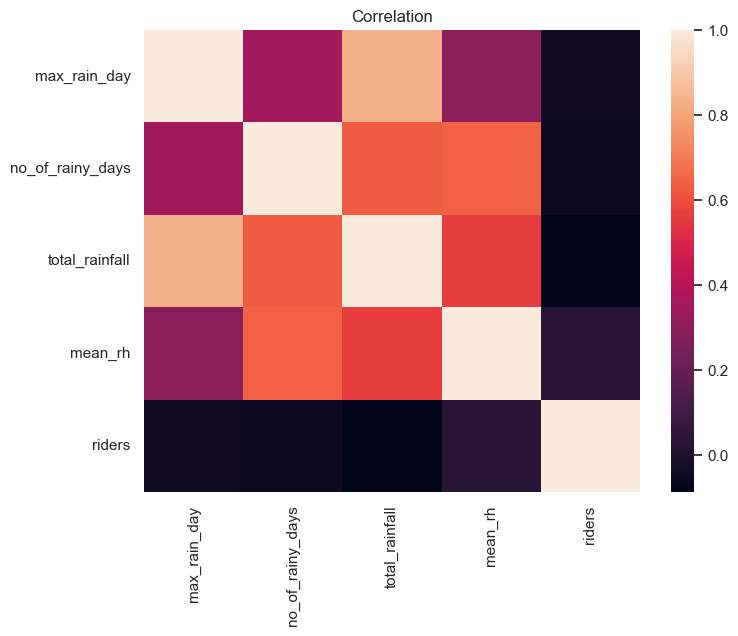

In [890]:
sns.heatmap(main.corr())
plt.title("Correlation")


Text(3, 4, 'annotate')

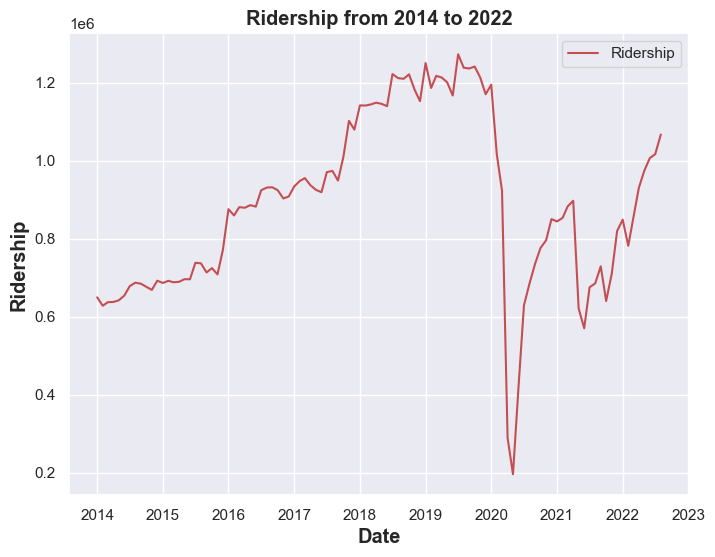

In [896]:

plt.plot(main['date'], main['riders'], marker='', linestyle='-', color='r', label='Ridership')
plt.xlabel('Date',fontsize='large', fontweight='bold')
plt.ylabel('Ridership',fontsize='large', fontweight='bold') 
plt.legend() 
plt.title('Ridership from 2014 to 2022', fontsize='large', fontweight='bold')



The sudden drop in ridershipis because of the pandemic (Covid-19), hence there will inconsistencies

Text(0.5, 1.0, 'Total Rainfall in 20 bins')

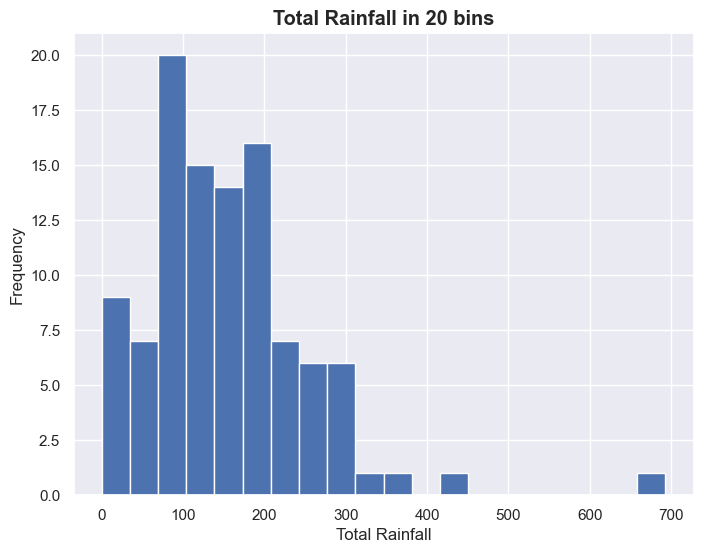

In [894]:
#Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
#OPTIONAL: Summarize the underlying distributions of your features (in words & statistics)
#Be thorough in your verbal description of these distributions.
#Be sure to back up these summaries with statistics.
#We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? 
#Explain your answers for each distribution and how you think this will affect estimates made from these data.
main.total_rainfall.plot(kind='hist', bins=20);
plt.xlabel('Total Rainfall');
plt.ylabel('Frequency');
plt.title('Total Rainfall in 20 bins', fontsize='large', fontweight='bold')


The above distribution is Right-skewed

In [ ]:
#Plot and interpret boxplots.
#Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
#Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
#Each boxplot should:
#Only include variables of a similar scale
#Have clear labels for each variable
#Have appropriate titles and labels

Text(0.5, 1.0, 'Total Rainfall Boxplot indicating outliers')

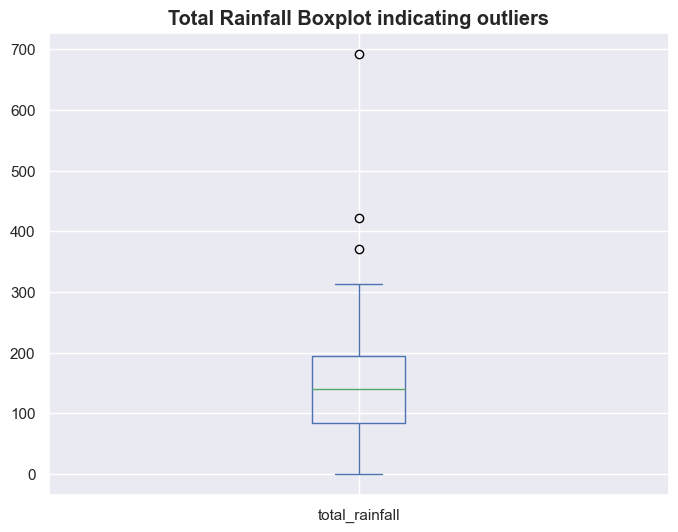

In [908]:


main.total_rainfall.plot(kind='box')

plt.title('Total Rainfall Boxplot indicating outliers', fontsize='large', fontweight='bold')



Text(0.5, 1.0, 'Total Ridership Boxplot indicating no outliers')

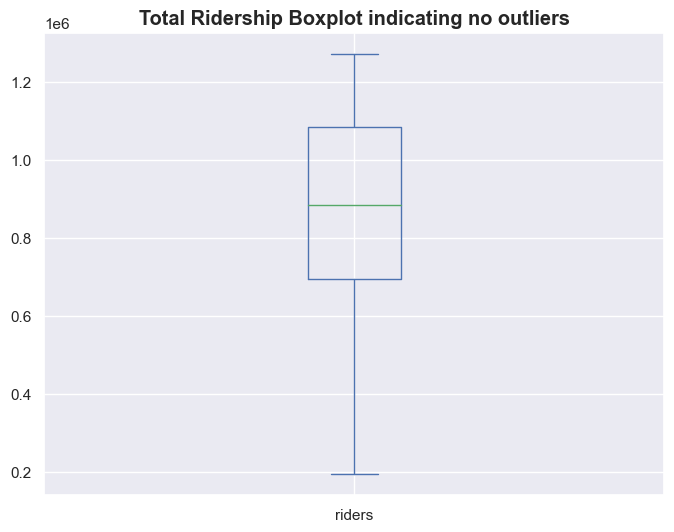

In [910]:
main.riders.plot(kind='box')
plt.title('Total Ridership Boxplot indicating no outliers', fontsize='large', fontweight='bold')

Text(0.5, 1.0, 'Maximum Rainfall Boxplot indicating outliers')

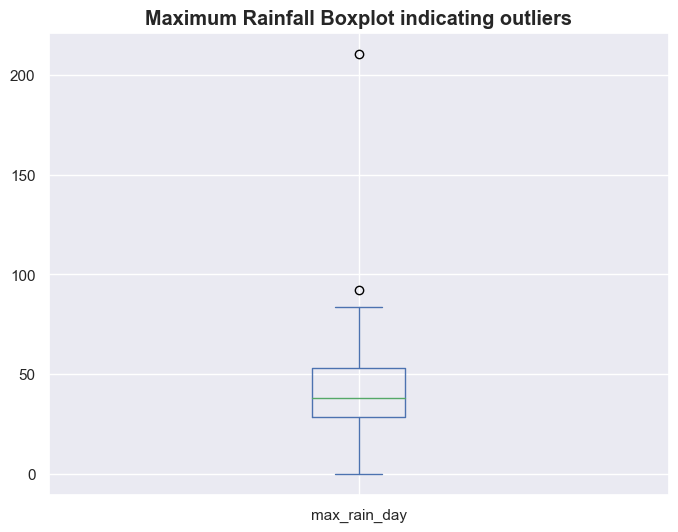

In [911]:
main.max_rain_day.plot(kind='box')
plt.title('Maximum Rainfall Boxplot indicating outliers', fontsize='large', fontweight='bold')

Text(0.5, 1.0, 'Number of rainy days indicating no outliers')

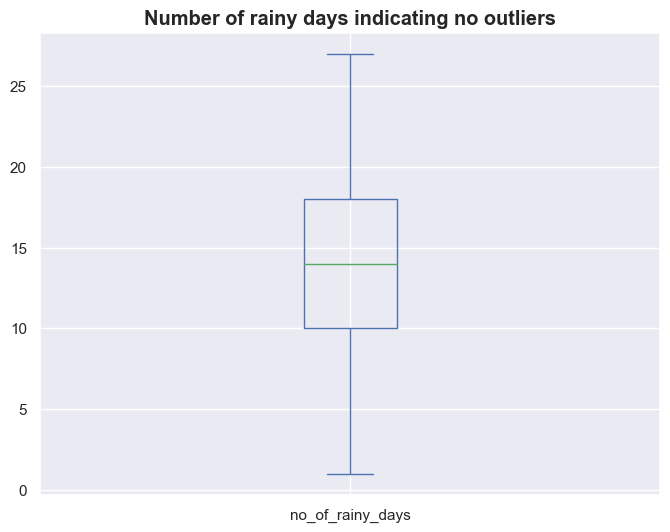

In [912]:
main.no_of_rainy_days.plot(kind='box')
plt.title('Number of rainy days indicating no outliers', fontsize='large', fontweight='bold')

Text(0.5, 1.0, 'Mean Relative Humidty Boxplot Indicating Outliers')

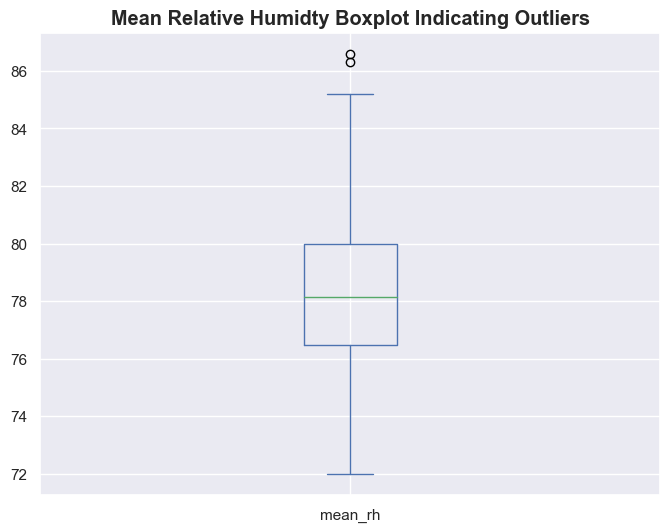

In [914]:
main.mean_rh.plot(kind='box')
plt.title('Mean Relative Humidty Boxplot Indicating Outliers', fontsize='large', fontweight='bold')

In [915]:
#Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
#Your plots should have:
#Two clearly labeled axes
#A proper title
#Colors and symbols that are clear and unmistakable

In [916]:
main

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,2014-01-01,31.2,5,75.4,78.5,649460
1,2014-02-01,0.2,1,0.2,74.5,627959
2,2014-03-01,52.6,6,66.0,76.0,637010
3,2014-04-01,28.8,17,110.0,80.0,637727
4,2014-05-01,22.2,18,125.8,80.2,641864
...,...,...,...,...,...,...
99,2022-04-01,58.8,18,239.6,80.0,930979
100,2022-05-01,44.6,12,102.0,76.5,974217
101,2022-06-01,59.4,17,211.8,79.1,1006992
102,2022-07-01,27.8,16,145.2,76.8,1016961


Text(0.5, 1.0, 'Scatter Plot Riders againts Total Rainfall')

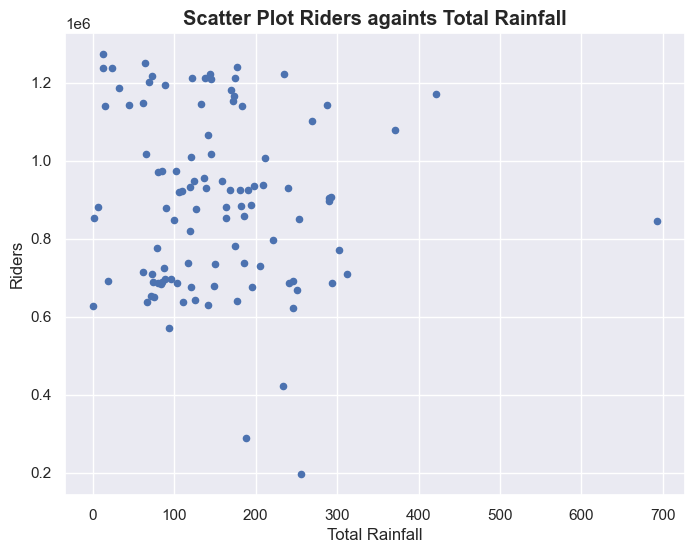

In [924]:
main.plot(kind='scatter', x='total_rainfall', y='riders');
plt.xlabel('Total Rainfall');
plt.ylabel('Riders');
plt.title('Scatter Plot Riders against Total Rainfall', fontsize='large', fontweight='bold')


Text(0.5, 1.0, 'Scatter Plot Riders against Total Rainfall')

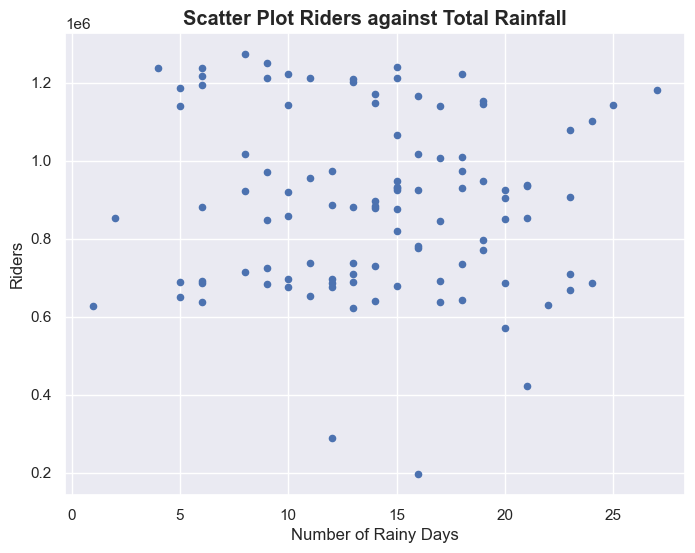

In [1081]:
main.plot(kind='scatter', x='no_of_rainy_days', y='riders');
plt.xlabel('Number of Rainy Days');
plt.ylabel('Riders');
plt.title('Scatter Plot Riders against Total Rainfall', fontsize='large', fontweight='bold')



Text(0.5, 1.0, 'Number of Rainy against Total Rainfall')

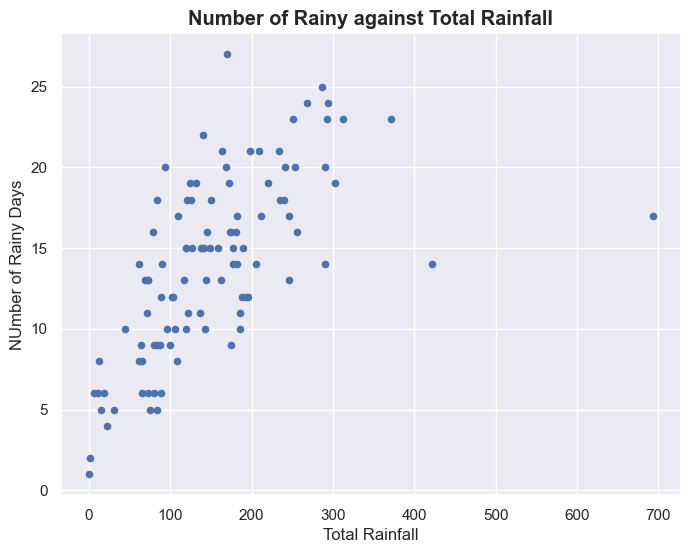

In [944]:
main.plot(kind='scatter', x='total_rainfall', y='no_of_rainy_days');
plt.xlabel('Total Rainfall');
plt.ylabel('NUmber of Rainy Days');
plt.title('Number of Rainy against Total Rainfall', fontsize='large', fontweight='bold')



array([[<Axes: xlabel='no_of_rainy_days', ylabel='no_of_rainy_days'>,
        <Axes: xlabel='total_rainfall', ylabel='no_of_rainy_days'>,
        <Axes: xlabel='riders', ylabel='no_of_rainy_days'>],
       [<Axes: xlabel='no_of_rainy_days', ylabel='total_rainfall'>,
        <Axes: xlabel='total_rainfall', ylabel='total_rainfall'>,
        <Axes: xlabel='riders', ylabel='total_rainfall'>],
       [<Axes: xlabel='no_of_rainy_days', ylabel='riders'>,
        <Axes: xlabel='total_rainfall', ylabel='riders'>,
        <Axes: xlabel='riders', ylabel='riders'>]], dtype=object)

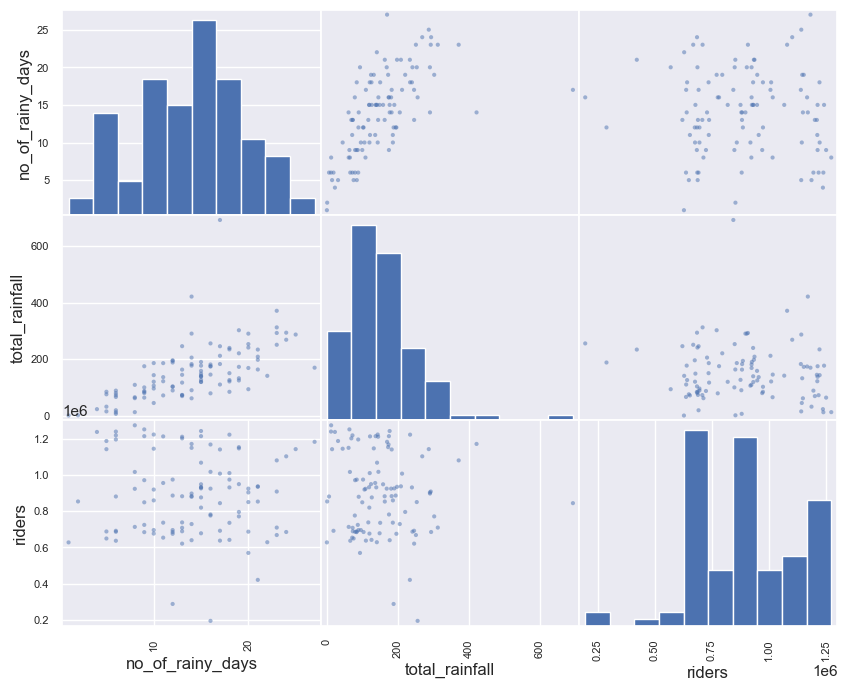

In [942]:
pd.plotting.scatter_matrix(main[['no_of_rainy_days', 'total_rainfall', 'riders']], figsize=(10, 8))


In [926]:
main

,date,max_rain_day,no_of_rainy_days,total_rainfall,mean_rh,riders
0,2014-01-01,31.2,5,75.4,78.5,649460
1,2014-02-01,0.2,1,0.2,74.5,627959
2,2014-03-01,52.6,6,66.0,76.0,637010
3,2014-04-01,28.8,17,110.0,80.0,637727
4,2014-05-01,22.2,18,125.8,80.2,641864
...,...,...,...,...,...,...
99,2022-04-01,58.8,18,239.6,80.0,930979
100,2022-05-01,44.6,12,102.0,76.5,974217
101,2022-06-01,59.4,17,211.8,79.1,1006992
102,2022-07-01,27.8,16,145.2,76.8,1016961


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

The following pointers are the  conclusions
On the wettest month, November and December, the ridership increases
Generally these months rains half of the time


Recommendations are as follows:
Increase maintenance frequency on trains and tracks during these month to lower breakdowns and faults
Increase train frequency to serve the larger crowd
Incentivize commuters to travel earlier than  intended timing.




Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!